In [1]:
import sys
sys.path += [".."]

In [2]:
import rebound
import numpy as np
from scipy.special import erf

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

In [3]:
from smbh import *

# Gravitational potential only

In [4]:
def gravitational_only(sim):
    pos = np.array(particle.xyz)
    r = np.linalg.norm(pos)
    coeff = -constants.G * (darkMatterMass(r) + baryonicMassHernquist(r)) / (r ** 2)
    dir_ = pos / r
    
    particle.ax += coeff * dir_[0]
    particle.ay += coeff * dir_[1]
    particle.az += coeff * dir_[2]

In [5]:
vs = sphericalToCartesian(280, np.pi / 4, np.pi / 4)
sim, particle = setupSimulation(1, [0, 1e-3, 0], vs, gravitational_only, velocity_dependent = 0)

times_g, positions_g, speeds_g = runSimulation(sim, particle, 2000)

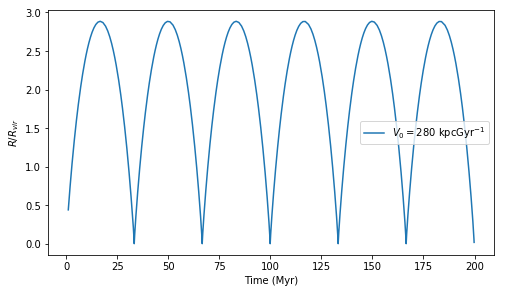

In [6]:
fig, ax = plotDistance(times_g, positions_g)
ax.legend(["$V_0 = 280$ kpcGyr$^{-1}$"])

# fig.savefig("gravitational_only.png", dpi = 300)
plt.show()

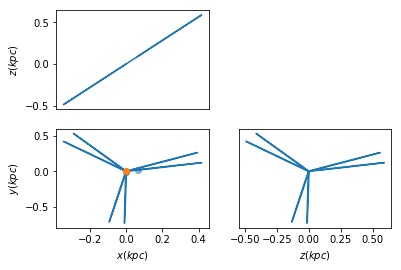

In [7]:
fig, axes = slicePlot(positions_g)

# DM dynamical friction

In [8]:
def gravitational_DM_DF(sim):
    pos = np.array(particle.xyz)
    speed = np.array(particle.vxyz)
    r = np.linalg.norm(pos)
    
    dir_ = pos / r
    grav = -constants.G * (darkMatterMass(r) + baryonicMassHernquist(r)) / (r ** 2)
    a = dynamicalFrictionDM(pos, speed, 1)
    
    particle.ax += grav * dir_[0] + a[0]
    particle.ay += grav * dir_[1] + a[1]
    particle.az += grav * dir_[2] + a[2]

In [9]:
rs = sphericalToCartesian(1e-3, 0, 0)
vs = sphericalToCartesian(280, np.pi / 4, np.pi / 4)
sim, particle = setupSimulation(1, rs, vs, gravitational_DM_DF)

times_df, positions_df, speeds_df = runSimulation(sim, particle, 2000)

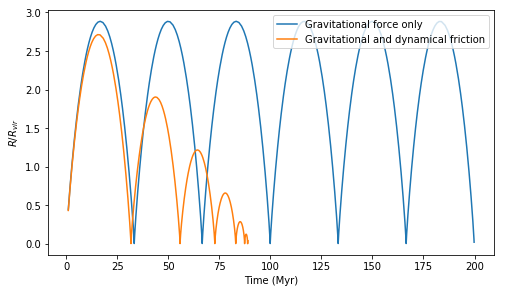

In [10]:
fig, ax = plotDistance(times_g, positions_g)
fig, ax = plotDistance(times_df, positions_df, ax = ax)
ax.legend(["Gravitational force only", "Gravitational and dynamical friction"])

fig.savefig("gravitational_DM_DF.png", dpi = 300)
plt.show()

In [11]:
rs = sphericalToCartesian(1e-3, 0, 0)

Vs = [280, 281]

times = []
positions = []
speeds = []

for vs in Vs:
    vs = sphericalToCartesian(vs, np.pi / 4, np.pi / 4)
    sim, particle = setupSimulation(1, rs, vs, gravitational_DM_DF)
    t, p, s = runSimulation(sim, particle, 2000)
    times.append(t)
    positions.append(p)
    speeds.append(s)

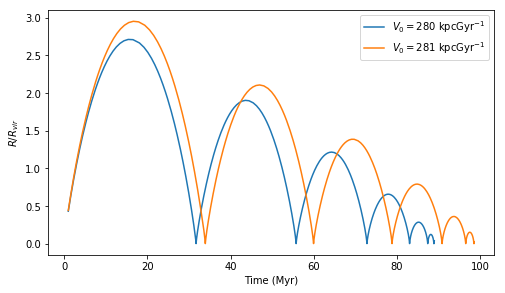

In [12]:
fig, ax = plotDistance(times[0], positions[0])
fig, ax = plotDistance(times[1], positions[1], ax = ax)

ax.legend(["$V_0 = 280$ kpcGyr$^{-1}$",
           "$V_0 = 281$ kpcGyr$^{-1}$"])
plt.show()